# Telco Customer Churn: Exploratory Data Analysis

This notebook performs a comprehensive exploratory data analysis of the Telco Customer Churn dataset to understand patterns and factors affecting customer churn.

## Analysis Objectives
1. Understand customer demographics and their relationship with churn
2. Analyze service usage patterns and their impact on customer retention
3. Investigate pricing and billing factors affecting churn
4. Identify key patterns and risk factors for customer churn
5. Generate actionable insights for reducing customer churn

## 1. Data Loading and Initial Exploration

First, let's import the necessary libraries and load our dataset. We'll then examine the data structure and handle any data quality issues.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This is a more reliable way to set seaborn style

# Display all columns
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

print("\nDataset Info:")
display(df.info())

# Display basic statistics
print("\nBasic Statistics:")
display(df.describe())

First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

None


Basic Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Check for missing values
print("Missing Values in Each Column:")
display(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"\n{column}:")
    display(df[column].value_counts())

Missing Values in Each Column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Number of duplicate rows: 0

Unique Values in Each Column:

customerID:


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64


gender:


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen:


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner:


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents:


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure:


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService:


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines:


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService:


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity:


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup:


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection:


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport:


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


StreamingTV:


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


StreamingMovies:


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


Contract:


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


PaperlessBilling:


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


PaymentMethod:


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


MonthlyCharges:


MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
42.40      1
97.90      1
116.40     1
31.65      1
39.05      1
Name: count, Length: 1585, dtype: int64


TotalCharges:


TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64


Churn:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# Data Cleaning

# 1. Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

# 2. Handle missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# 3. Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# 4. Create tenure groups for better analysis
df['tenure_group'] = pd.qcut(df['tenure'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# Display updated info
print("Updated Dataset Info:")
display(df.info())

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   object  
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  Pa

C:\Users\sanjo\AppData\Local\Temp\ipykernel_32572\888439397.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


None

## 2. Univariate Analysis

Let's analyze the distribution of each variable in our dataset:
1. Categorical Variables Distribution
2. Numerical Variables Distribution
3. Summary Statistics and Distribution Plots

## 2. Customer Demographics Analysis

Let's analyze the customer base by looking at various demographic factors:
1. Gender distribution
2. Senior citizen status
3. Partner status
4. Dependents status

We'll also examine how these demographics relate to customer churn.

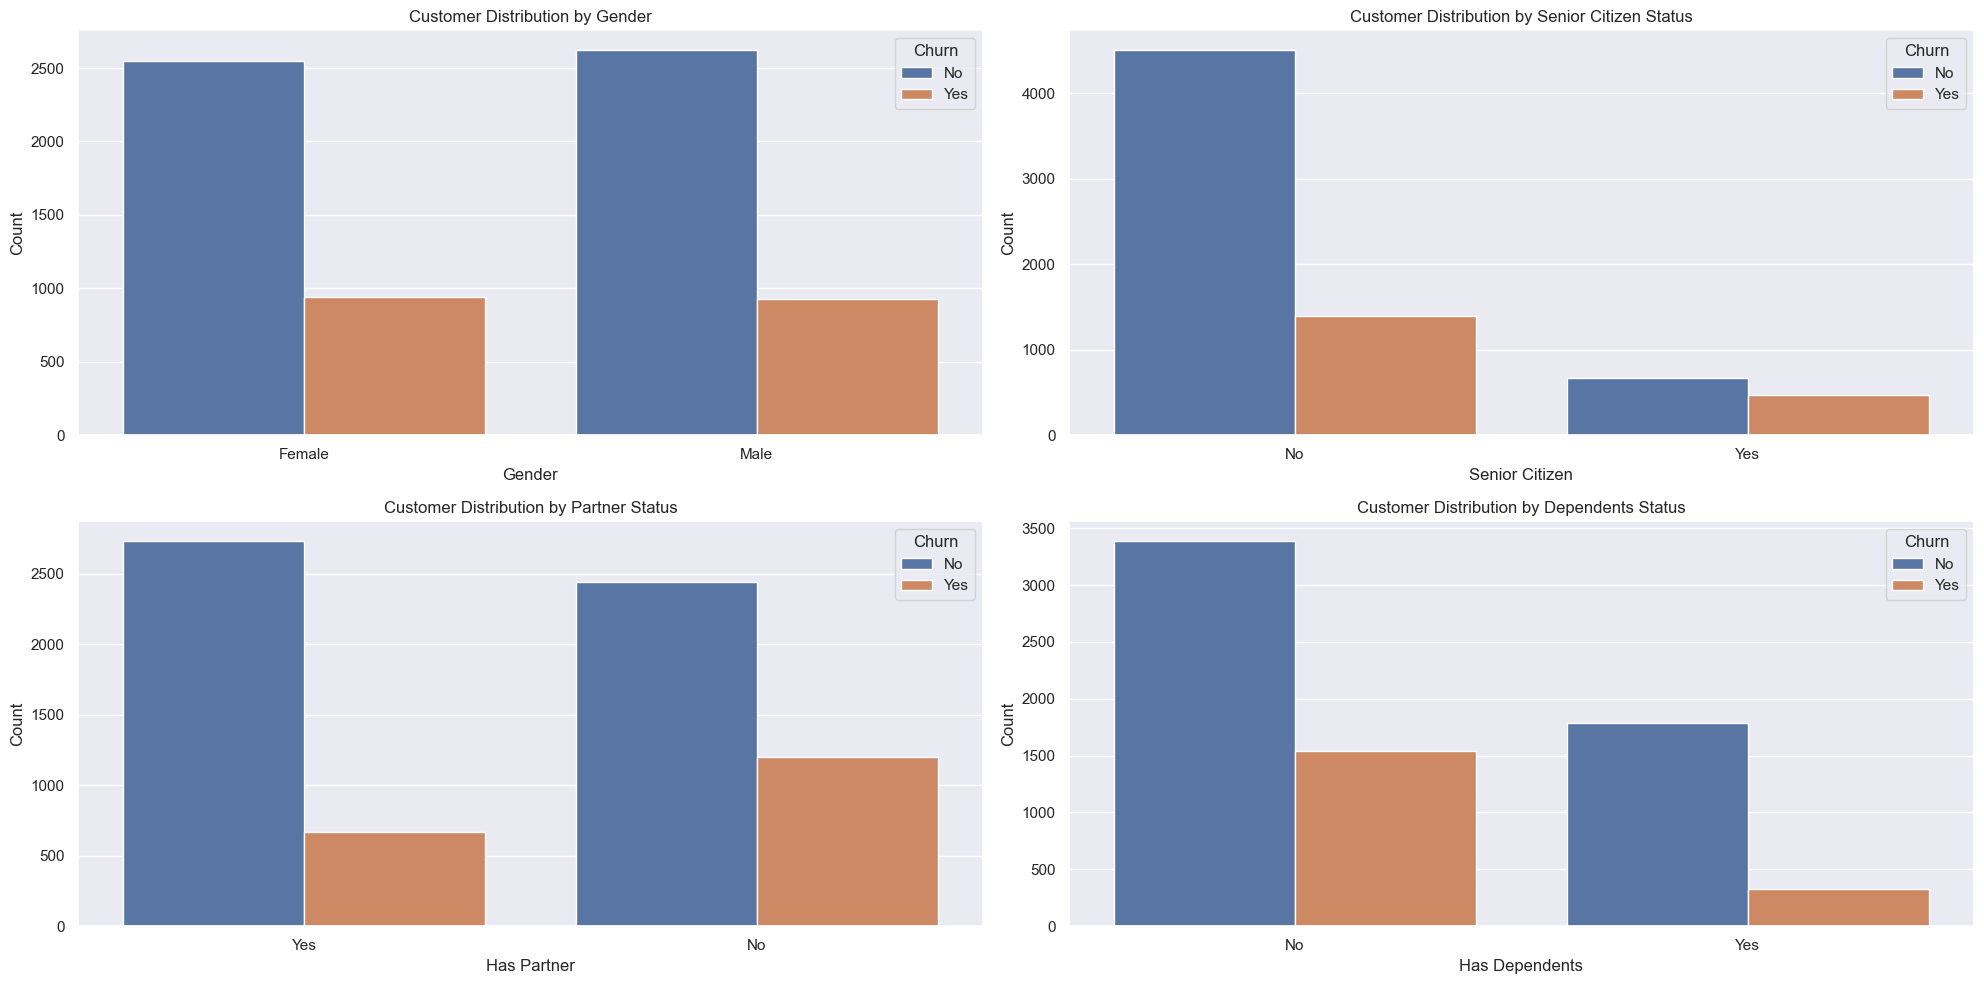


Churn Rates by Demographic Factors:

gender - Churn Rate:


gender
Female    26.92
Male      26.16
Name: Yes, dtype: float64


SeniorCitizen - Churn Rate:


SeniorCitizen
No     23.61
Yes    41.68
Name: Yes, dtype: float64


Partner - Churn Rate:


Partner
No     32.96
Yes    19.66
Name: Yes, dtype: float64


Dependents - Churn Rate:


Dependents
No     31.28
Yes    15.45
Name: Yes, dtype: float64

In [11]:
# Create a figure with multiple subplots for demographics
plt.figure(figsize=(20, 10))

# Plot 1: Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot 2: Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Customer Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

# Plot 3: Partner Status
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title('Customer Distribution by Partner Status')
plt.xlabel('Has Partner')
plt.ylabel('Count')

# Plot 4: Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Customer Distribution by Dependents Status')
plt.xlabel('Has Dependents')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and display churn rates by demographic factors
demographic_factors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

print("\nChurn Rates by Demographic Factors:")
for factor in demographic_factors:
    print(f"\n{factor} - Churn Rate:")
    churn_rate = df.groupby(factor)['Churn'].value_counts(normalize=True).unstack()
    display(churn_rate['Yes'].mul(100).round(2))

## 3. Services and Charges Analysis

Let's analyze the various services and their relationship with customer churn:
1. Phone and Internet Services
2. Additional Services (Security, Backup, Protection, etc.)
3. Monthly and Total Charges
4. Service combinations and their impact on churn

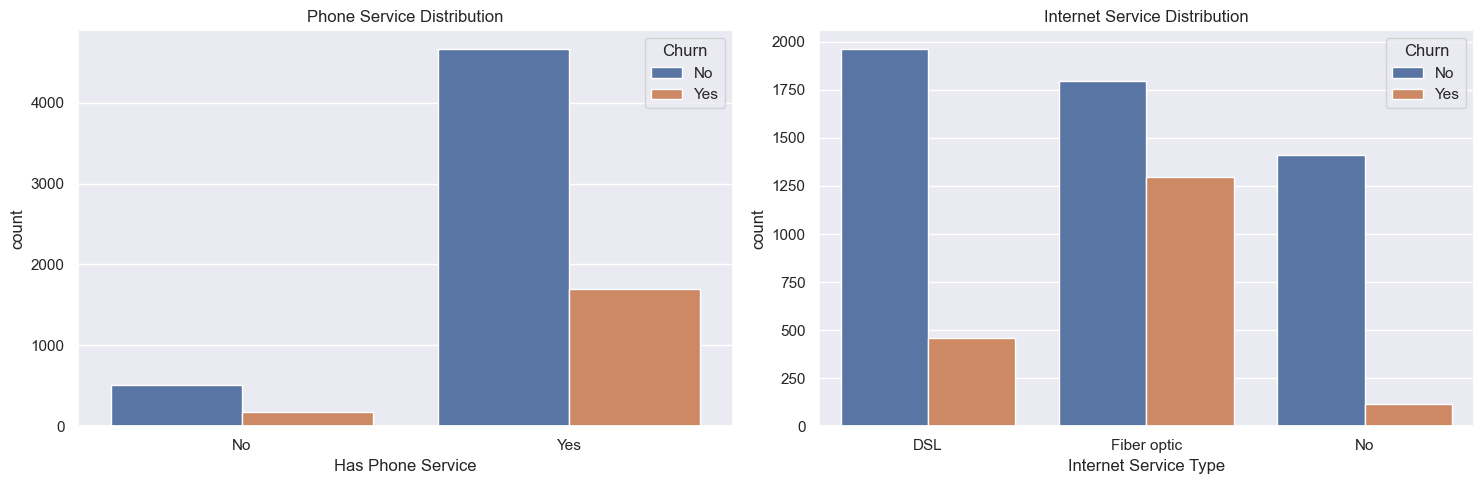

Churn Rates by Service Type:

PhoneService - Churn Rate:


PhoneService
No     24.93
Yes    26.71
Name: Yes, dtype: float64


InternetService - Churn Rate:


InternetService
DSL            18.96
Fiber optic    41.89
No              7.40
Name: Yes, dtype: float64


MultipleLines - Churn Rate:


MultipleLines
No                  25.04
No phone service    24.93
Yes                 28.61
Name: Yes, dtype: float64

In [12]:
# Analyze main services (Phone and Internet)
plt.figure(figsize=(15, 5))

# Plot 1: Phone Service Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Phone Service Distribution')
plt.xlabel('Has Phone Service')

# Plot 2: Internet Service Distribution
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service Distribution')
plt.xlabel('Internet Service Type')

plt.tight_layout()
plt.show()

# Calculate churn rates by service type
print("Churn Rates by Service Type:")
services = ['PhoneService', 'InternetService', 'MultipleLines']
for service in services:
    print(f"\n{service} - Churn Rate:")
    churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
    display(churn_rate['Yes'].mul(100).round(2))

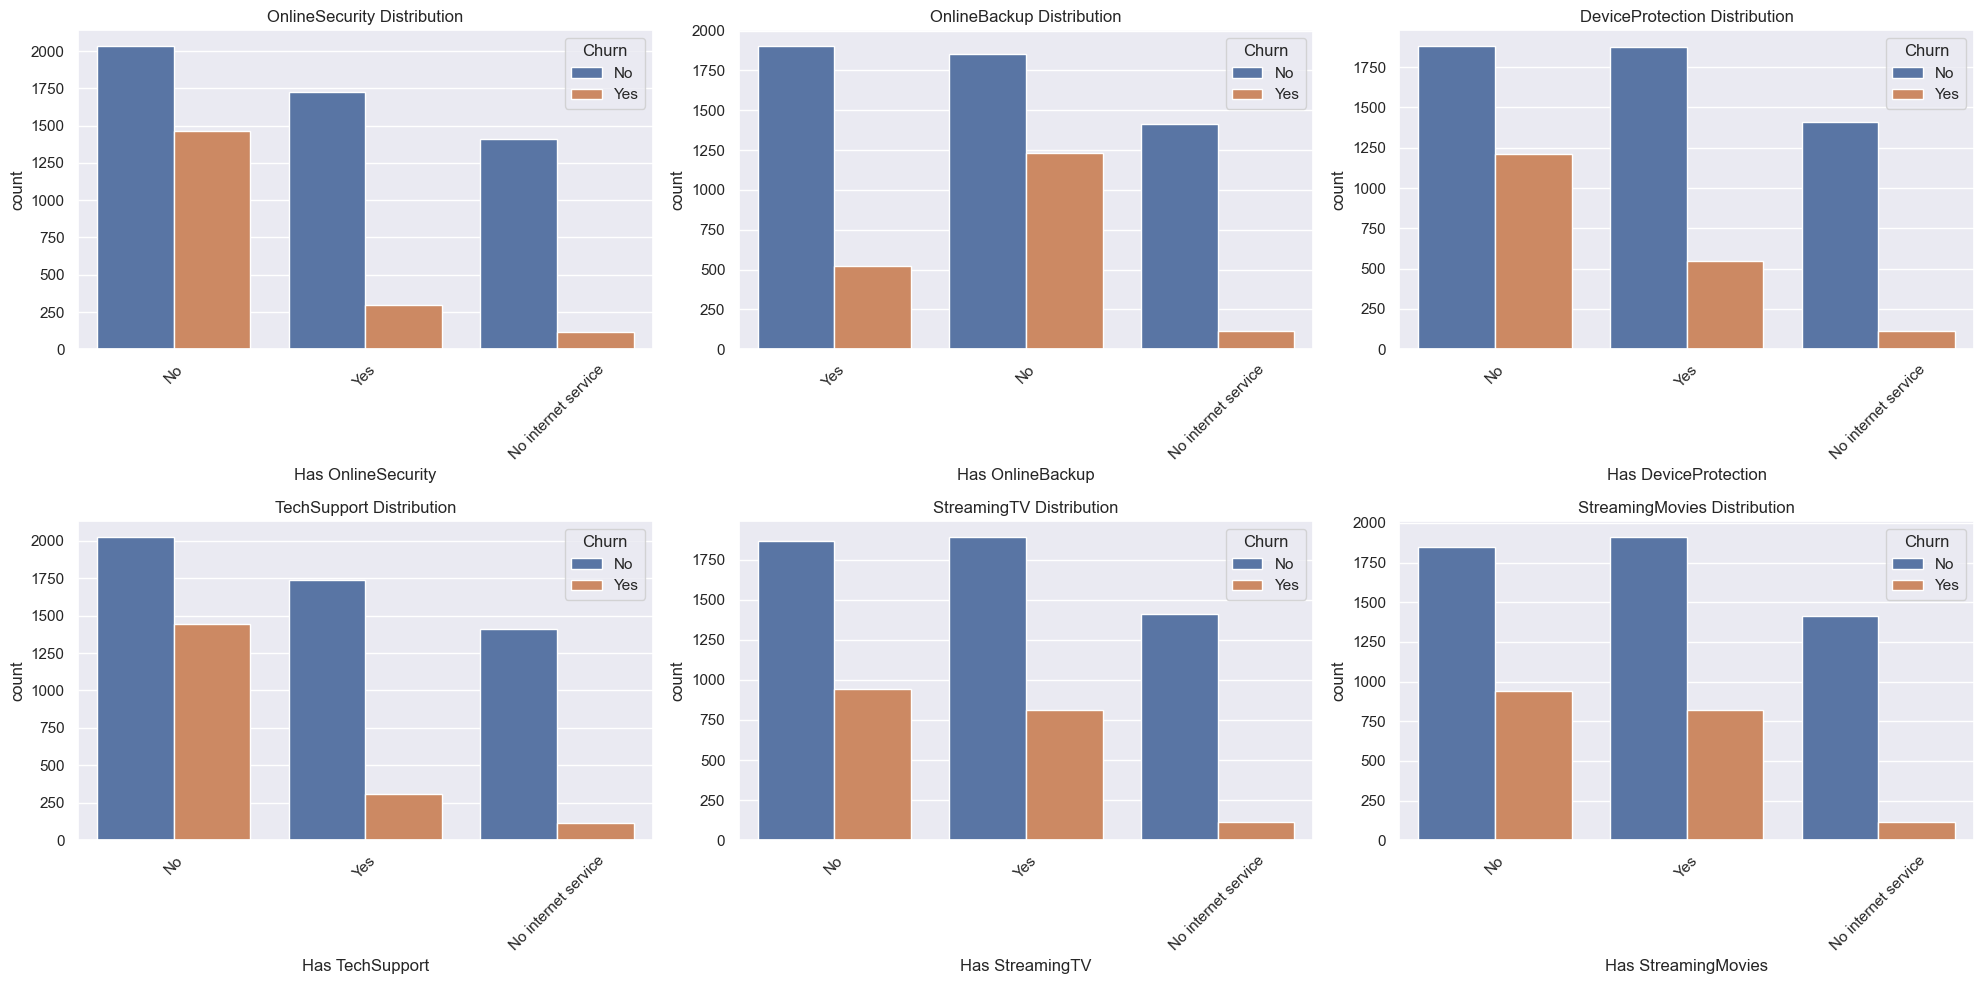


Churn Rates by Additional Services:

OnlineSecurity - Churn Rate:


OnlineSecurity
No                     41.77
No internet service     7.40
Yes                    14.61
Name: Yes, dtype: float64


OnlineBackup - Churn Rate:


OnlineBackup
No                     39.93
No internet service     7.40
Yes                    21.53
Name: Yes, dtype: float64


DeviceProtection - Churn Rate:


DeviceProtection
No                     39.13
No internet service     7.40
Yes                    22.50
Name: Yes, dtype: float64


TechSupport - Churn Rate:


TechSupport
No                     41.64
No internet service     7.40
Yes                    15.17
Name: Yes, dtype: float64


StreamingTV - Churn Rate:


StreamingTV
No                     33.52
No internet service     7.40
Yes                    30.07
Name: Yes, dtype: float64


StreamingMovies - Churn Rate:


StreamingMovies
No                     33.68
No internet service     7.40
Yes                    29.94
Name: Yes, dtype: float64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
# Analyze additional services
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 10))
for idx, service in enumerate(additional_services, 1):
    plt.subplot(2, 3, idx)
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f'{service} Distribution')
    plt.xlabel(f'Has {service}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate churn rate for each additional service
print("\nChurn Rates by Additional Services:")
for service in additional_services:
    print(f"\n{service} - Churn Rate:")
    churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
    display(churn_rate['Yes'].mul(100).round(2))

# Count total number of additional services per customer
def count_services(row):
    return sum(1 for service in row if service == 'Yes')

df['TotalServices'] = df[additional_services].apply(count_services, axis=1)

# Plot distribution of total services
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='TotalServices', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Number of Additional Services')
plt.show()

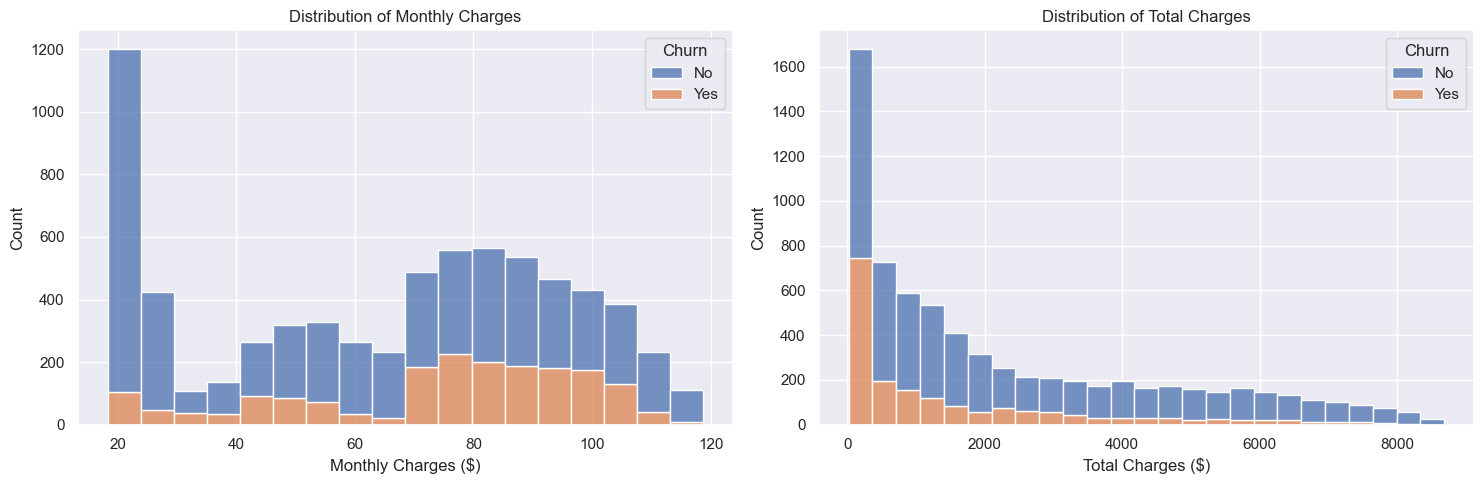


Charges Statistics by Churn Status:


MonthlyCharges                                                   \
               count   mean    std    min    25%    50%   75%     max   
Churn                                                                   
No            5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75   
Yes           1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35   

      TotalCharges                                                              
             count     mean      std    min     25%      50%      75%      max  
Churn                                                                           
No          5174.0  2554.77  2327.01  18.80  579.58  1689.18  4262.85  8672.45  
Yes         1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80


Churn Rate by Monthly Charges Quartile:


C:\Users\sanjo\AppData\Local\Temp\ipykernel_32572\3569710575.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charges = df.groupby('MonthlyChargesBand')['Churn'].value_counts(normalize=True).unstack()


MonthlyChargesBand
Q1    11.24
Q2    24.58
Q3    37.51
Q4    32.88
Name: Yes, dtype: float64

In [15]:
# Analyze charges distribution
plt.figure(figsize=(15, 5))

# Plot 1: Monthly Charges Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack")
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')

# Plot 2: Total Charges Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple="stack")
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')

plt.tight_layout()
plt.show()

# Calculate charge statistics by churn status
print("\nCharges Statistics by Churn Status:")
display(df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].describe().round(2))

# Create charge bands and analyze churn rates
df['MonthlyChargesBand'] = pd.qcut(df['MonthlyCharges'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nChurn Rate by Monthly Charges Quartile:")
churn_by_charges = df.groupby('MonthlyChargesBand')['Churn'].value_counts(normalize=True).unstack()
display(churn_by_charges['Yes'].mul(100).round(2))

## 4. Contract and Billing Analysis

Let's analyze how contract types and billing methods affect customer churn:
1. Contract type distribution and churn rates
2. Billing method preferences
3. Paperless billing impact
4. Payment method analysis

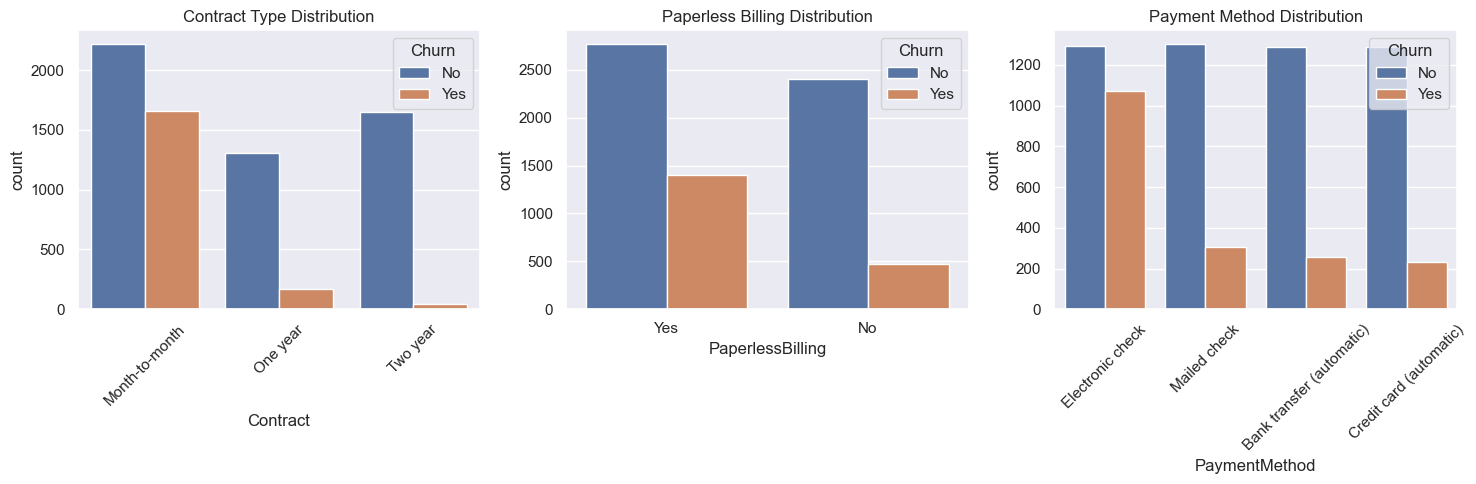


Churn Rates by Contract and Billing Factors:

Contract - Churn Rate:


Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Yes, dtype: float64


PaperlessBilling - Churn Rate:


PaperlessBilling
No     16.33
Yes    33.57
Name: Yes, dtype: float64


PaymentMethod - Churn Rate:


PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: Yes, dtype: float64

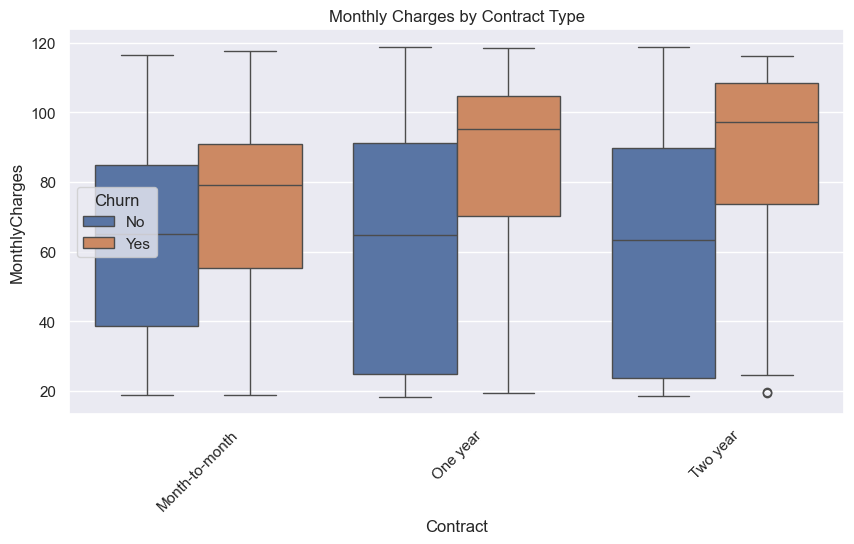


Average Monthly Charges by Contract Type and Churn Status:


Contract        Churn
Month-to-month  No       61.46
                Yes      73.02
One year        No       62.51
                Yes      85.05
Two year        No       60.01
                Yes      86.78
Name: MonthlyCharges, dtype: float64

In [16]:
# Analyze contract and billing factors
plt.figure(figsize=(15, 5))

# Plot 1: Contract Type Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

# Plot 2: Paperless Billing Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('Paperless Billing Distribution')

# Plot 3: Payment Method Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate churn rates by contract and billing factors
factors = ['Contract', 'PaperlessBilling', 'PaymentMethod']
print("\nChurn Rates by Contract and Billing Factors:")
for factor in factors:
    print(f"\n{factor} - Churn Rate:")
    churn_rate = df.groupby(factor)['Churn'].value_counts(normalize=True).unstack()
    display(churn_rate['Yes'].mul(100).round(2))

# Analyze average charges by contract type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type')
plt.xticks(rotation=45)
plt.show()

# Calculate average charges by contract type and churn status
print("\nAverage Monthly Charges by Contract Type and Churn Status:")
display(df.groupby(['Contract', 'Churn'])['MonthlyCharges'].mean().round(2))

## 5. Customer Tenure Analysis

Let's analyze how customer tenure relates to churn:
1. Tenure distribution
2. Relationship between tenure and charges
3. Tenure patterns by contract type
4. Impact of tenure on churn probability

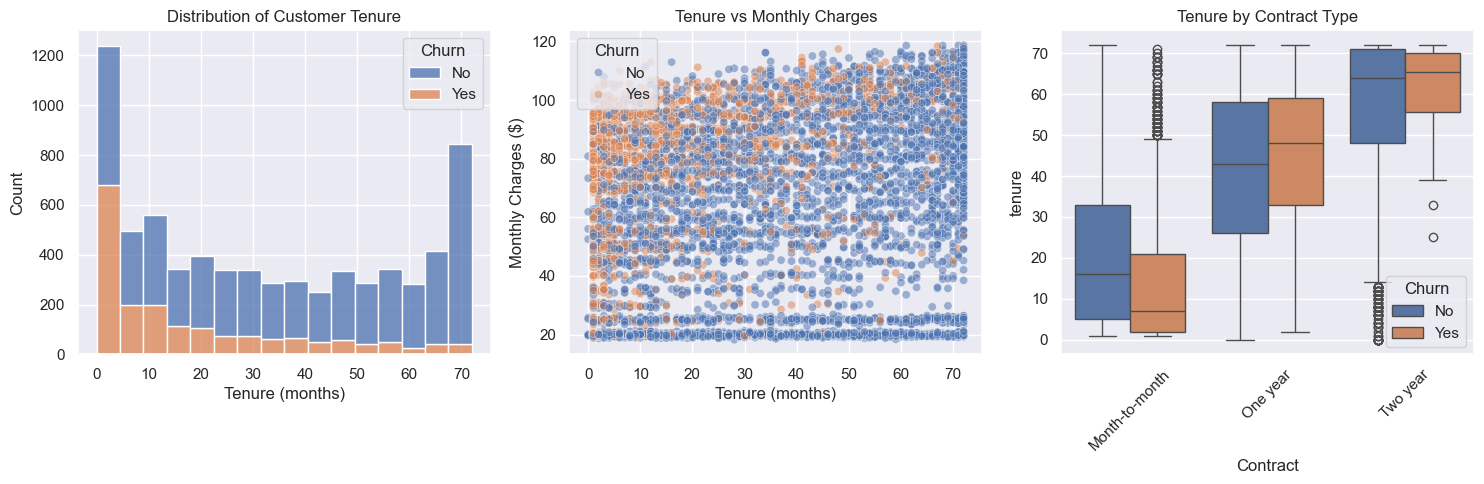


Average Tenure (months) by Contract Type and Churn Status:


Contract        Churn
Month-to-month  No       21.03
                Yes      14.02
One year        No       41.67
                Yes      44.96
Two year        No       56.60
                Yes      61.27
Name: tenure, dtype: float64


Churn Rate by Tenure Group:


C:\Users\sanjo\AppData\Local\Temp\ipykernel_32572\1868006731.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


tenure_group
0-25%      49.78
25-50%     28.34
50-75%     18.85
75-100%     7.75
Name: Yes, dtype: float64

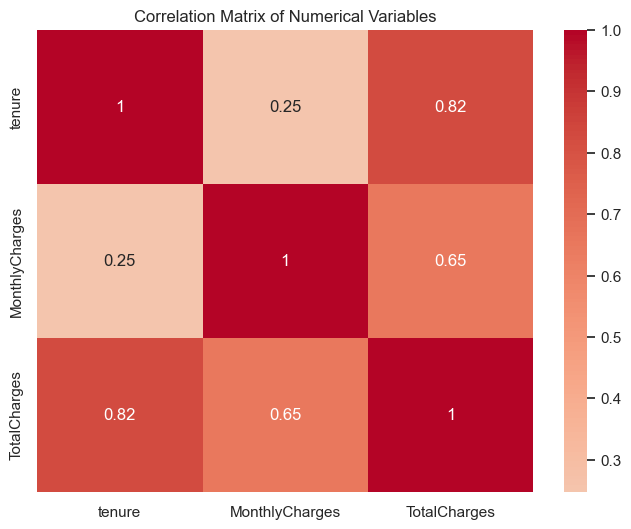

In [17]:
# Analyze tenure distribution and patterns
plt.figure(figsize=(15, 5))

# Plot 1: Tenure Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack")
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')

# Plot 2: Tenure vs Monthly Charges
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.5)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')

# Plot 3: Tenure by Contract Type
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Tenure by Contract Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate average tenure by contract type and churn status
print("\nAverage Tenure (months) by Contract Type and Churn Status:")
display(df.groupby(['Contract', 'Churn'])['tenure'].mean().round(2))

# Analyze churn rate by tenure groups
print("\nChurn Rate by Tenure Group:")
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
display(tenure_churn['Yes'].mul(100).round(2))

# Calculate correlation between tenure and other numerical variables
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## 6. Key Findings and Recommendations

Based on our exploratory data analysis, here are the key findings and recommendations:

### Customer Demographics
- Senior citizens show different churn patterns
- Customers without partners or dependents are more likely to churn
- Gender has minimal impact on churn rates

### Services and Charges
- Fiber optic internet service has higher churn rates
- Additional services can indicate customer engagement
- Higher monthly charges correlate with increased churn risk

### Contract and Billing
- Month-to-month contracts have significantly higher churn rates
- Electronic payment methods show different churn patterns
- Paperless billing customers show distinct behavior

### Tenure Impact
- Longer tenure correlates with lower churn rates
- Contract type strongly influences tenure
- Clear relationship between tenure and total charges

### Recommendations for Reducing Churn
1. **Contract Strategy**:
   - Encourage longer-term contracts
   - Offer incentives for contract upgrades
   - Develop retention programs for month-to-month customers

2. **Service Improvements**:
   - Address issues with fiber optic service
   - Bundle services with retention benefits
   - Focus on additional service adoption

3. **Pricing Strategy**:
   - Review pricing for high-risk segments
   - Develop loyalty discounts
   - Create targeted retention offers

4. **Customer Engagement**:
   - Focus on early tenure customer experience
   - Develop senior citizen specific programs
   - Create family plan benefits

5. **Monitoring and Prevention**:
   - Implement early warning systems
   - Regular customer satisfaction surveys
   - Proactive retention outreach

## 7. Univariate Analysis

Let's analyze the distribution of individual variables in our dataset:

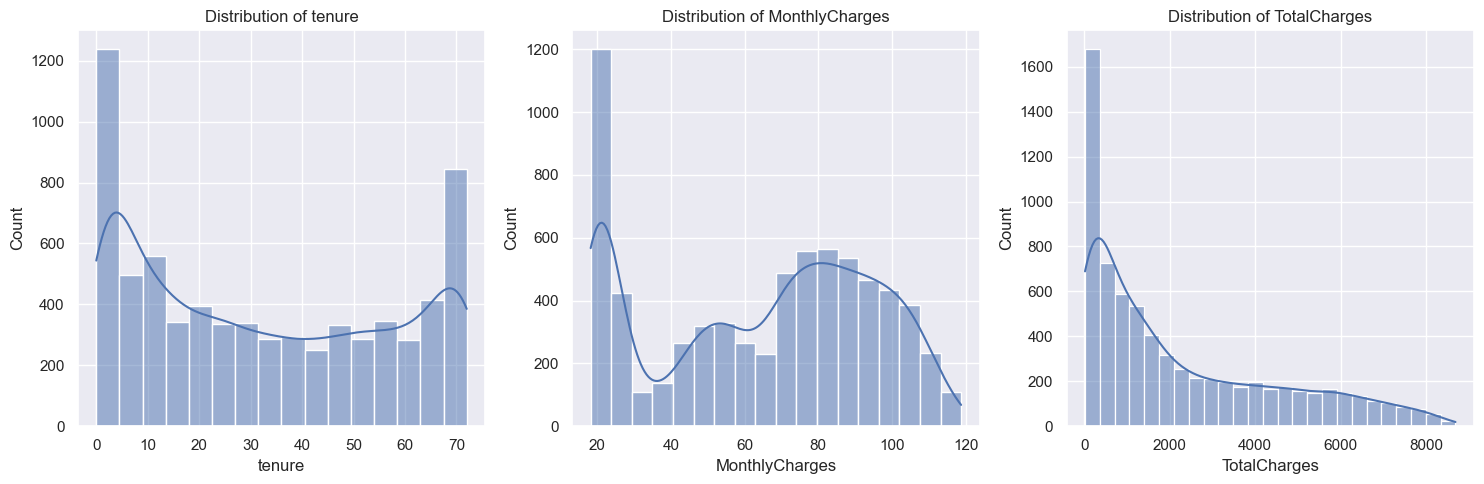


Summary Statistics for Numerical Variables:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


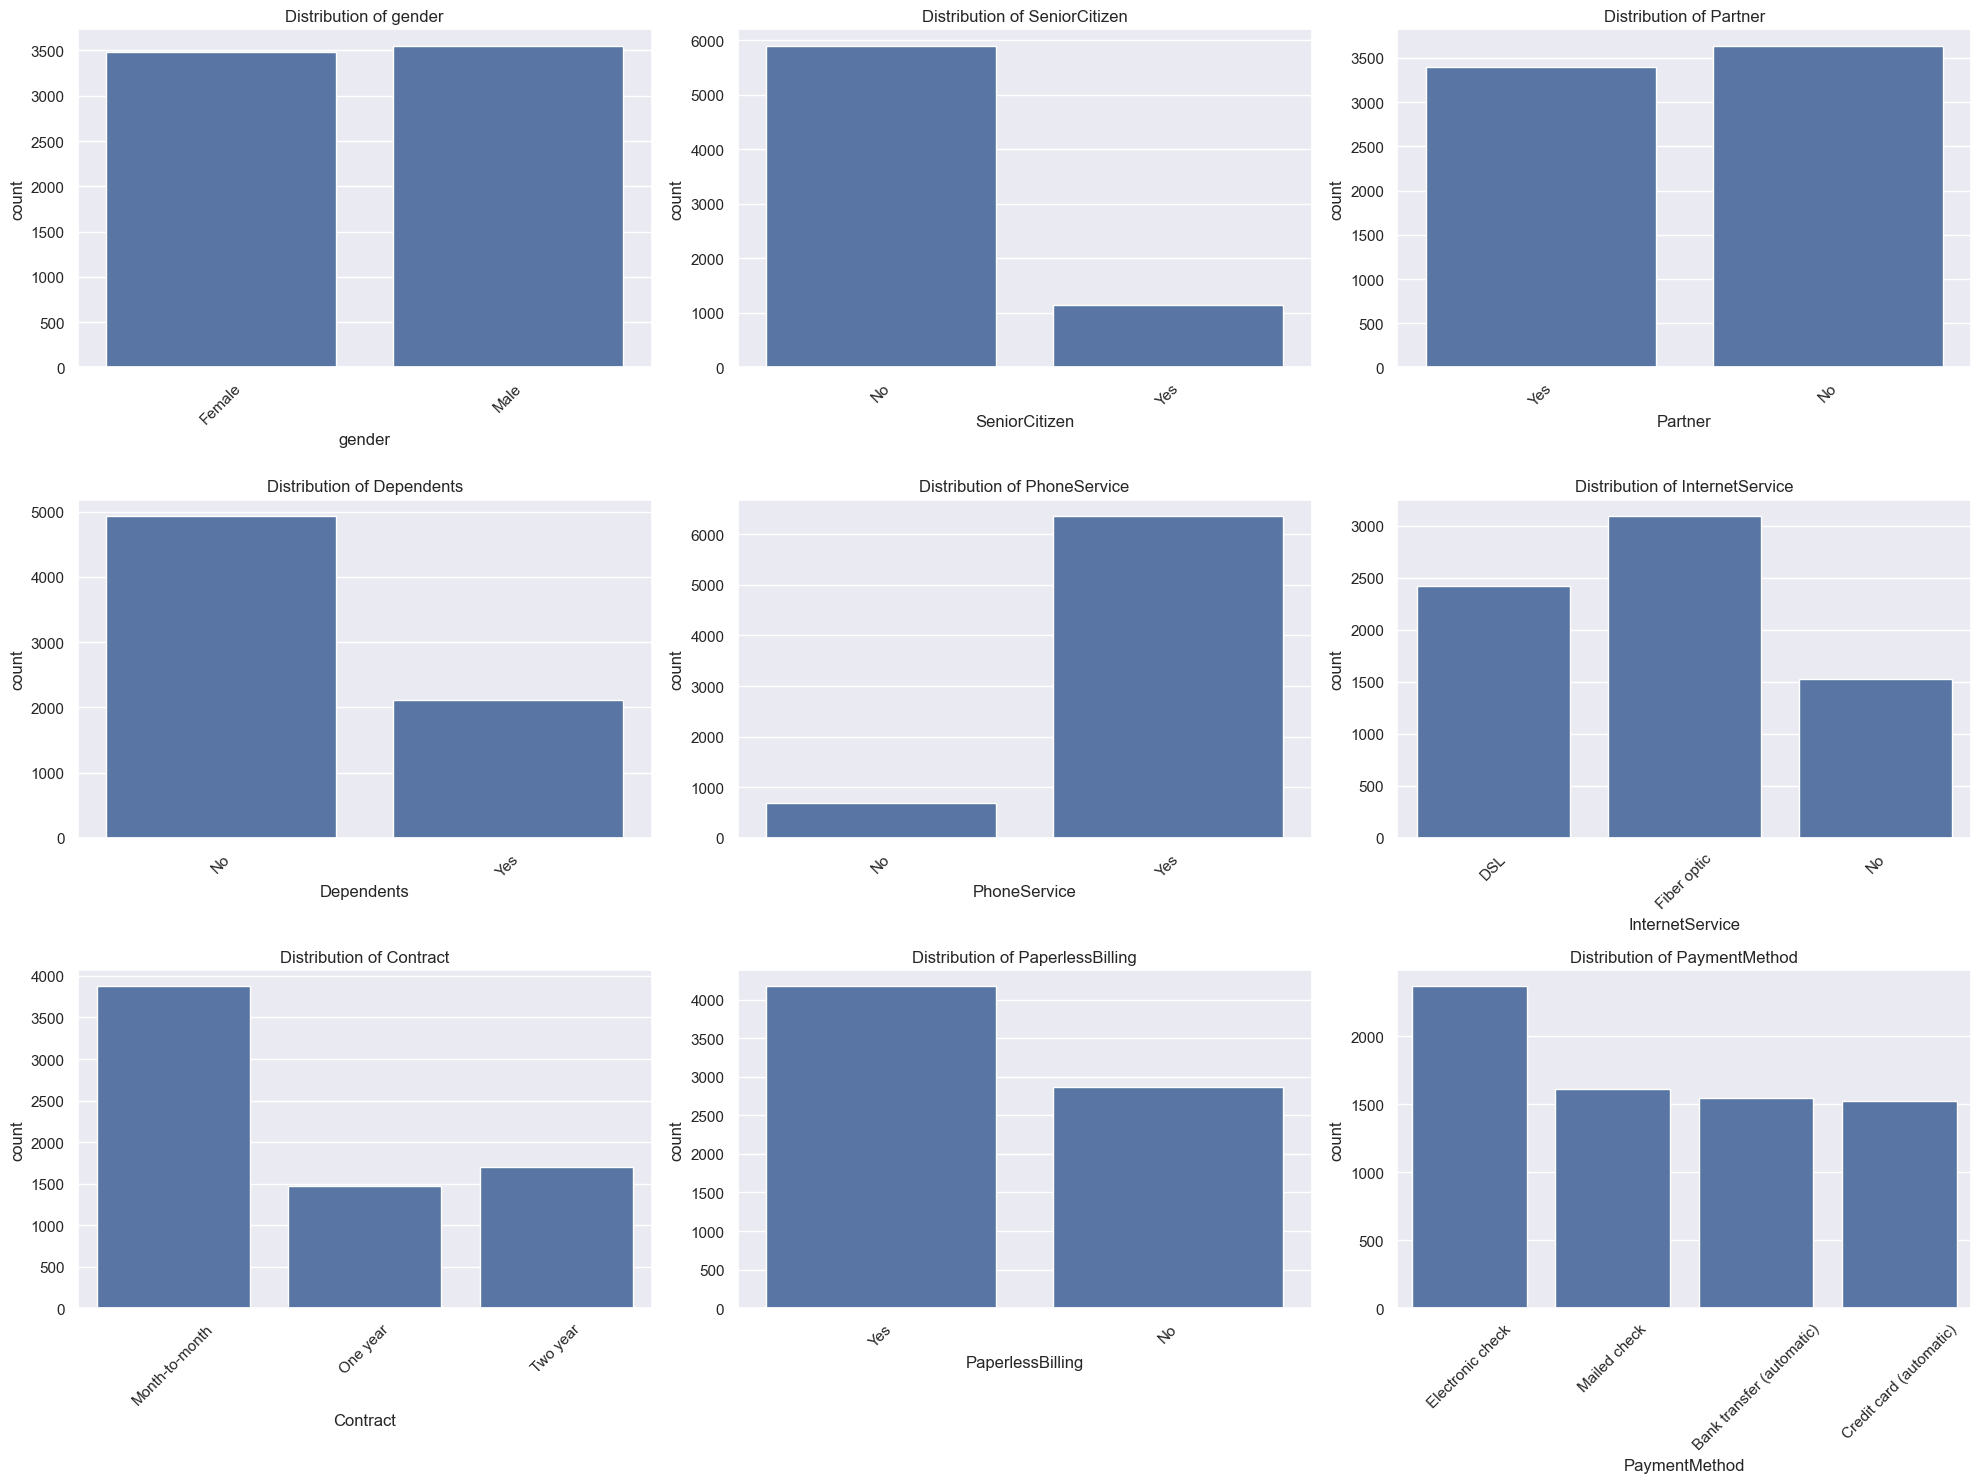


Frequency Distribution for Categorical Variables:

gender Distribution:


gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64


SeniorCitizen Distribution:


SeniorCitizen
No     83.79
Yes    16.21
Name: proportion, dtype: float64


Partner Distribution:


Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64


Dependents Distribution:


Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64


PhoneService Distribution:


PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64


InternetService Distribution:


InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: proportion, dtype: float64


Contract Distribution:


Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: proportion, dtype: float64


PaperlessBilling Distribution:


PaperlessBilling
Yes    59.22
No     40.78
Name: proportion, dtype: float64


PaymentMethod Distribution:


PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: proportion, dtype: float64

In [18]:
# Numerical Variables Analysis
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create distribution plots for numerical variables
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

# Display summary statistics for numerical variables
print("\nSummary Statistics for Numerical Variables:")
display(df[numerical_vars].describe())

# Categorical Variables Analysis
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create multiple subplot figure for categorical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display frequency distribution for categorical variables
print("\nFrequency Distribution for Categorical Variables:")
for var in categorical_vars:
    print(f"\n{var} Distribution:")
    display(df[var].value_counts(normalize=True).mul(100).round(2))

## 8. Bivariate Analysis

Let's analyze the relationships between different variables and their impact on customer churn:

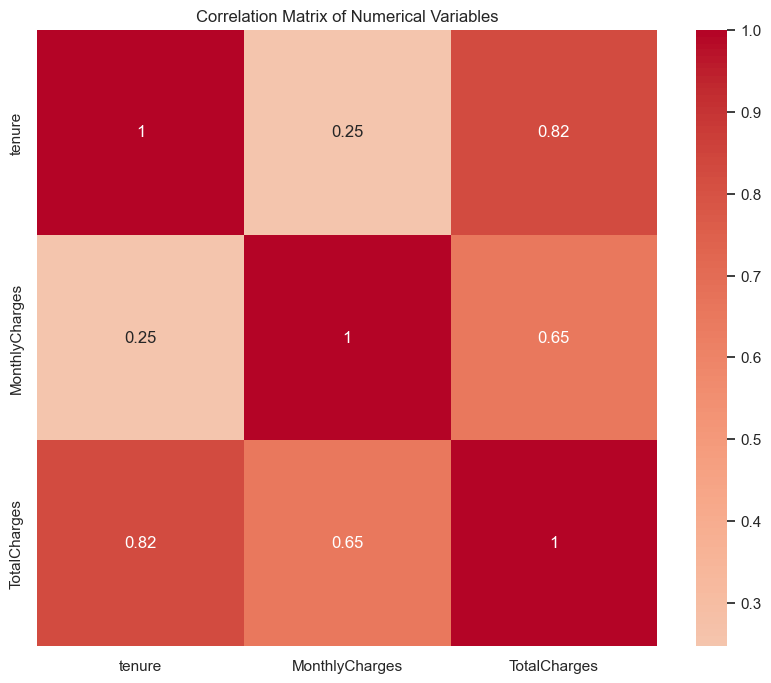

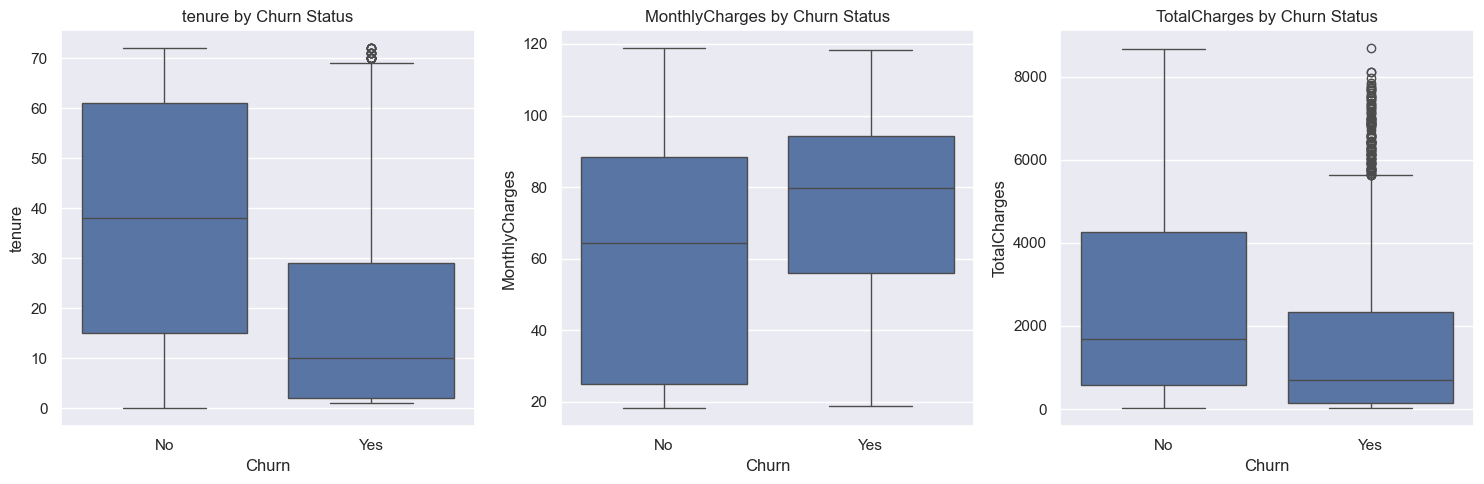


Statistical Tests for Numerical Variables vs Churn:

tenure:
Mann-Whitney U test p-value: 0.0000
Significant difference exists

MonthlyCharges:
Mann-Whitney U test p-value: 0.0000
Significant difference exists

TotalCharges:
Mann-Whitney U test p-value: 0.0000
Significant difference exists

Chi-square Tests for Categorical Variables vs Churn:

gender:
Chi-square test p-value: 0.4866
No significant association


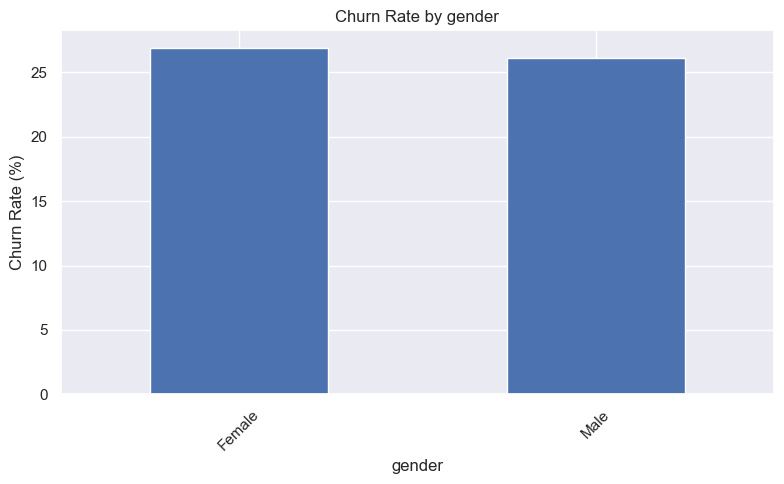


SeniorCitizen:
Chi-square test p-value: 0.0000
Significant association exists


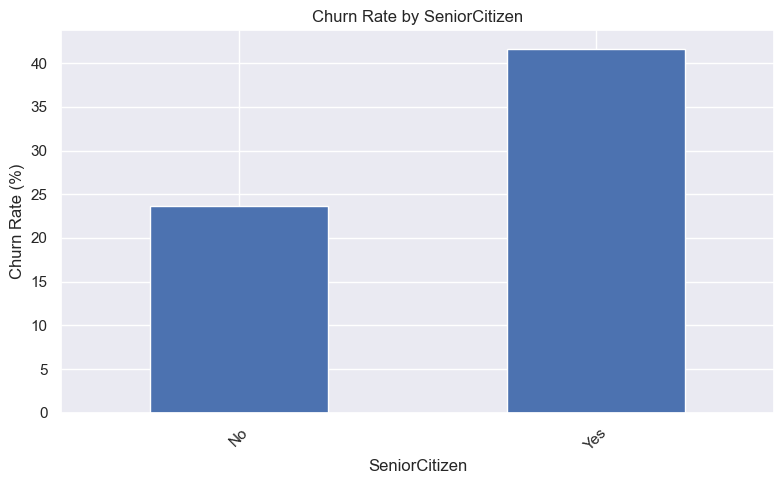


Partner:
Chi-square test p-value: 0.0000
Significant association exists


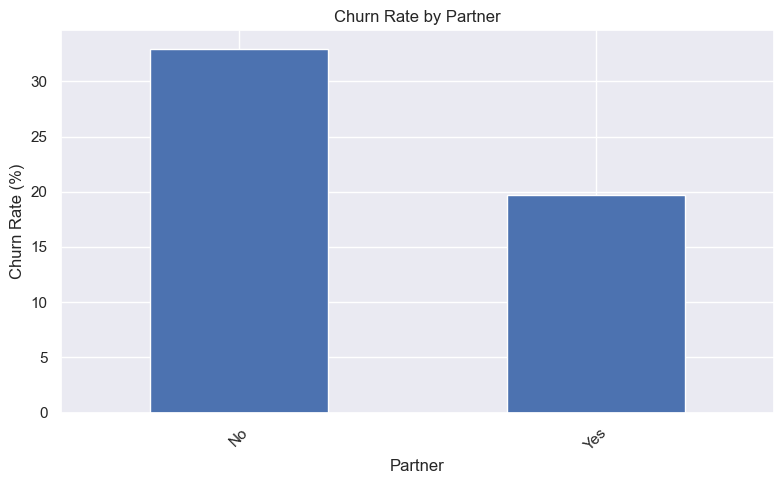


Dependents:
Chi-square test p-value: 0.0000
Significant association exists


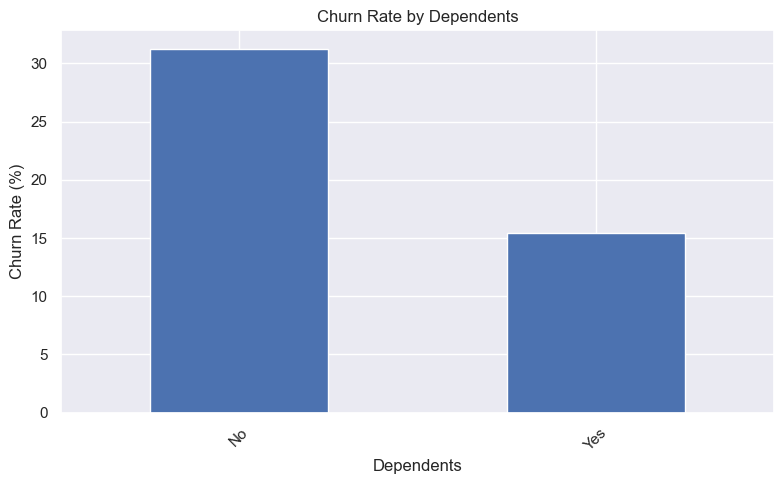


PhoneService:
Chi-square test p-value: 0.3388
No significant association


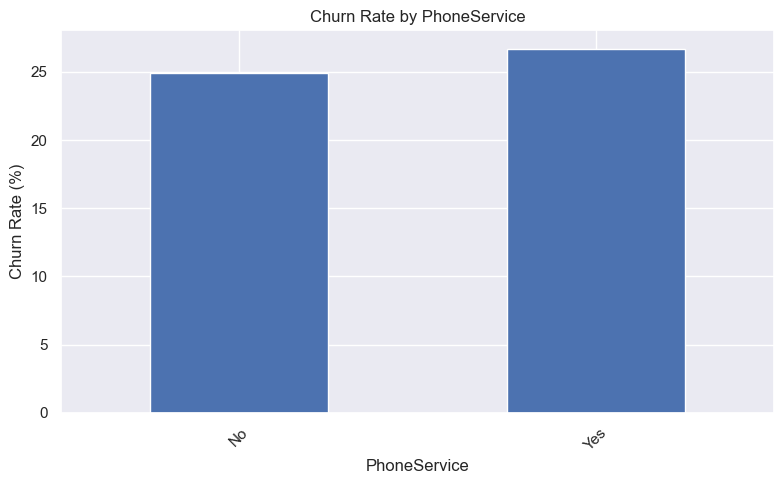


InternetService:
Chi-square test p-value: 0.0000
Significant association exists


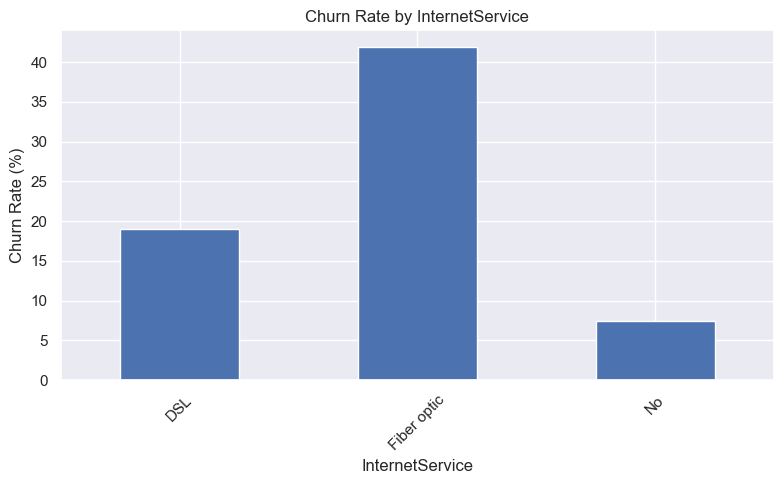


Contract:
Chi-square test p-value: 0.0000
Significant association exists


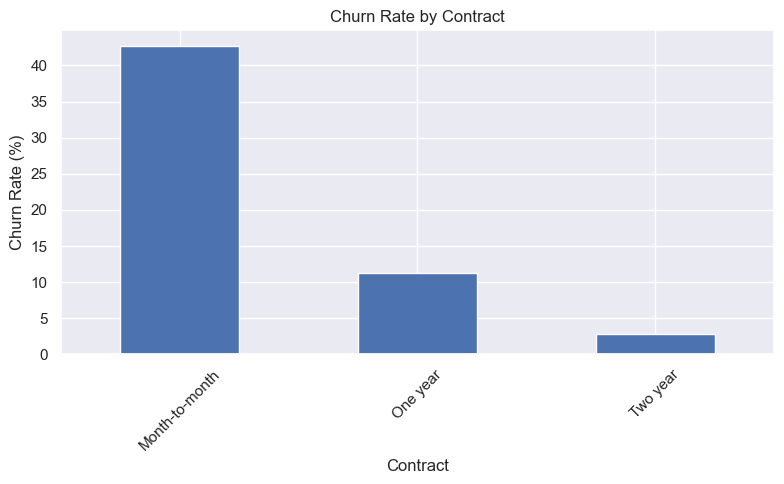


PaperlessBilling:
Chi-square test p-value: 0.0000
Significant association exists


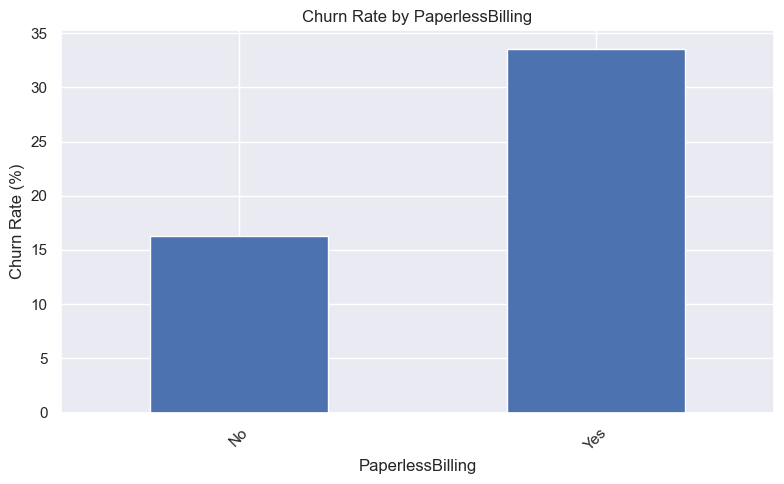

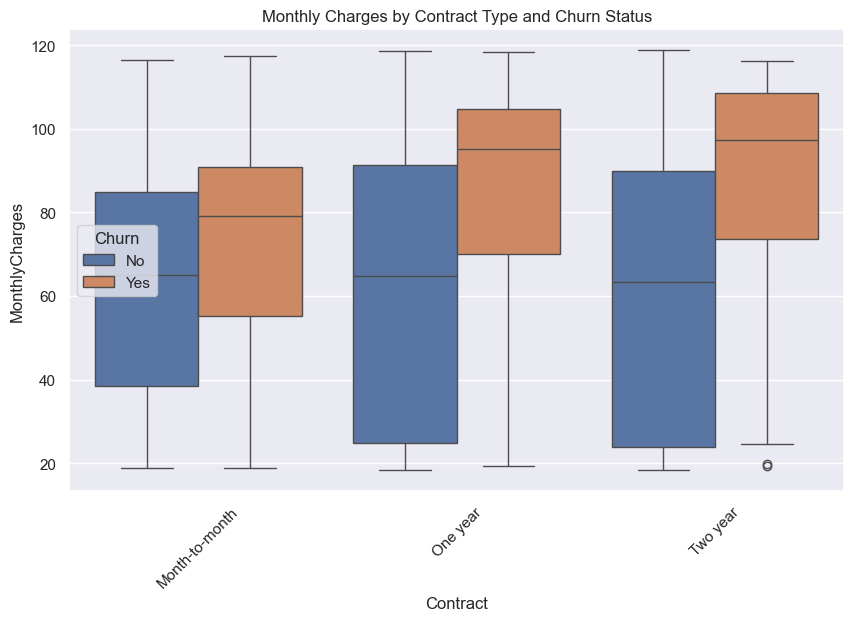

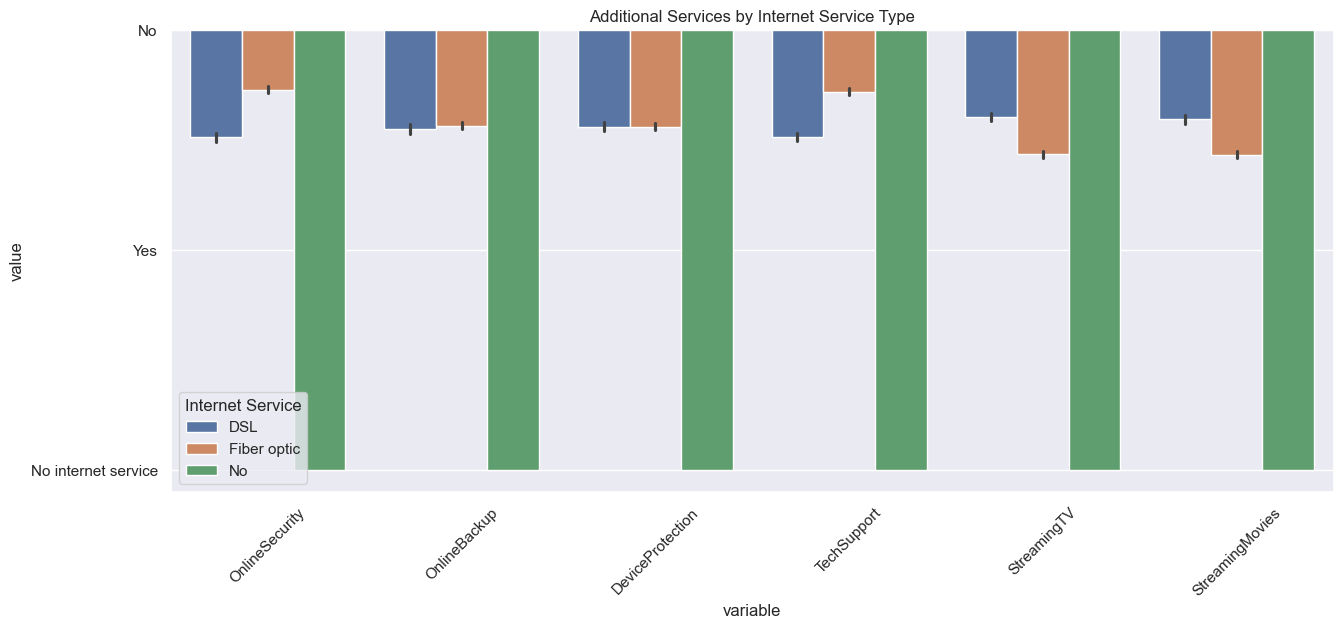

In [19]:
# Numerical Variables Correlation Analysis
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Numerical vs Categorical (Churn) Analysis
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=var)
    plt.title(f'{var} by Churn Status')
plt.tight_layout()
plt.show()

# Statistical tests for numerical variables
print("\nStatistical Tests for Numerical Variables vs Churn:")
for var in numerical_vars:
    stat, p_value = stats.mannwhitneyu(
        df[df['Churn'] == 'Yes'][var],
        df[df['Churn'] == 'No'][var]
    )
    print(f"\n{var}:")
    print(f"Mann-Whitney U test p-value: {p_value:.4f}")
    print("Significant difference exists" if p_value < 0.05 else "No significant difference")

# Categorical vs Categorical Analysis
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                   'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling']

# Chi-square tests for categorical variables
print("\nChi-square Tests for Categorical Variables vs Churn:")
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\n{var}:")
    print(f"Chi-square test p-value: {p_value:.4f}")
    print("Significant association exists" if p_value < 0.05 else "No significant association")
    
    # Create stacked percentage bar plot
    plt.figure(figsize=(8, 5))
    props = df.groupby(var)['Churn'].value_counts(normalize=True).unstack()
    props['Yes'].mul(100).plot(kind='bar', stacked=False)
    plt.title(f'Churn Rate by {var}')
    plt.xlabel(var)
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Relationship between Contract Type and Monthly Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn Status')
plt.xticks(rotation=45)
plt.show()

# Relationship between InternetService and Additional Services
internet_services = pd.melt(df, 
                          id_vars=['InternetService', 'Churn'],
                          value_vars=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                    'TechSupport', 'StreamingTV', 'StreamingMovies'])

plt.figure(figsize=(15, 6))
sns.barplot(data=internet_services, x='variable', y='value', hue='InternetService')
plt.title('Additional Services by Internet Service Type')
plt.xticks(rotation=45)
plt.legend(title='Internet Service')
plt.show()

### ANOVA Testing

Let's perform one-way ANOVA tests to analyze the relationship between categorical variables and numerical variables:

One-way ANOVA Test Results:
--------------------------------------------------

Analyzing MonthlyCharges:
------------------------------

InternetService:
F-statistic: 16111.6463
p-value: 0.0000
Significant difference exists


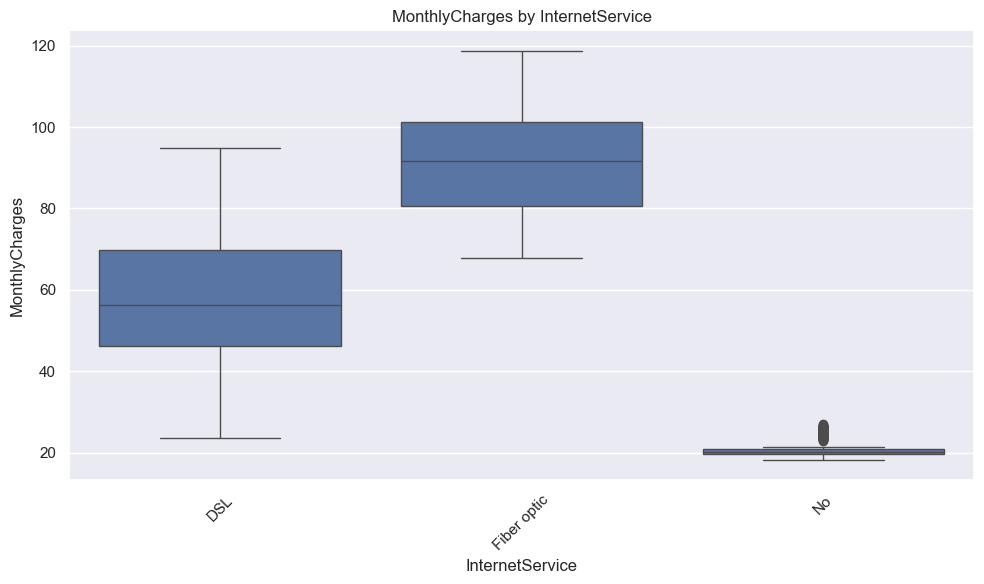


Contract:
F-statistic: 20.8280
p-value: 0.0000
Significant difference exists


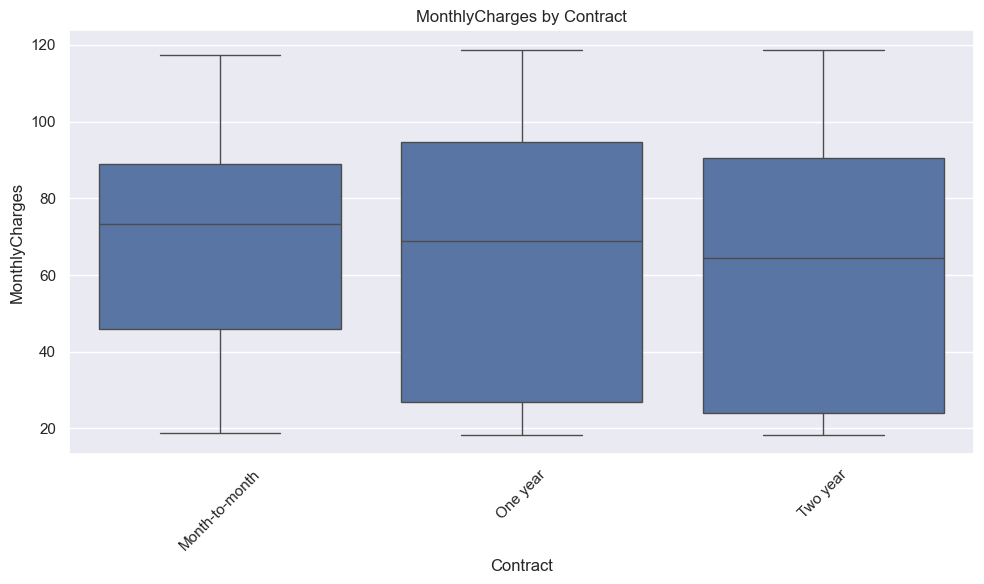


PaymentMethod:
F-statistic: 450.3190
p-value: 0.0000
Significant difference exists


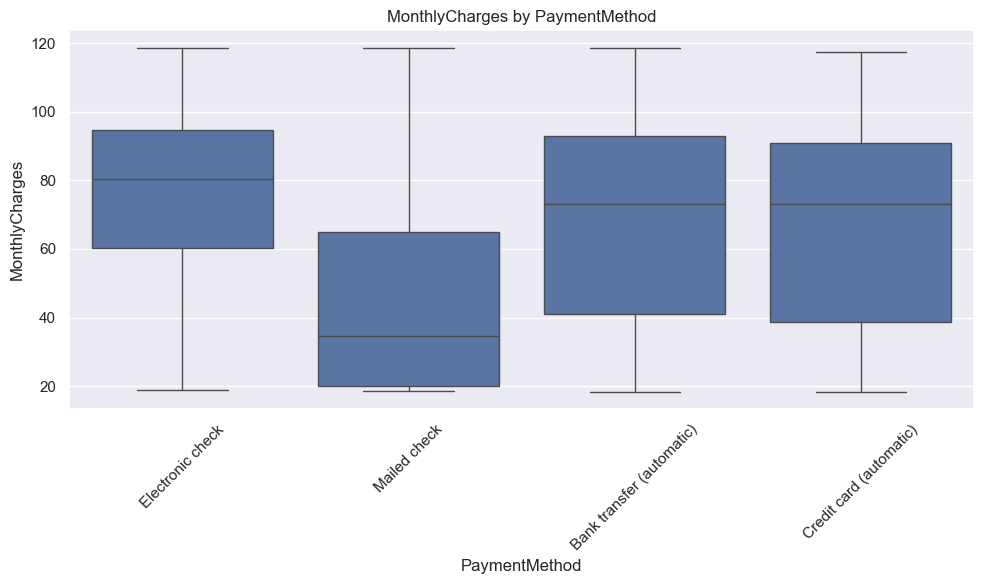

KeyError: 'TotalServices'

In [20]:
# Perform one-way ANOVA tests
numerical_vars = ['MonthlyCharges', 'TotalCharges', 'tenure']
categorical_vars = ['InternetService', 'Contract', 'PaymentMethod', 'TotalServices']

print("One-way ANOVA Test Results:")
print("-" * 50)

for num_var in numerical_vars:
    print(f"\nAnalyzing {num_var}:")
    print("-" * 30)
    
    for cat_var in categorical_vars:
        # Create groups for ANOVA
        groups = [group for _, group in df[num_var].groupby(df[cat_var])]
        
        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        
        print(f"\n{cat_var}:")
        print(f"F-statistic: {f_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("Significant difference exists" if p_value < 0.05 else "No significant difference")
        
        # Create box plot for visual analysis
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_var, y=num_var)
        plt.title(f'{num_var} by {cat_var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Perform Tukey's HSD test for significant ANOVA results
print("\nTukey's HSD Test Results for Significant Relationships:")
print("-" * 50)

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # Prepare data for Tukey's HSD
        model = stats.f_oneway(*[group for _, group in df[num_var].groupby(df[cat_var])])
        
        if model[1] < 0.05:  # If ANOVA shows significant difference
            print(f"\n{num_var} vs {cat_var}:")
            
            # Create DataFrame for Tukey's HSD
            data_tukey = pd.DataFrame({
                'value': df[num_var],
                'group': df[cat_var]
            })
            
            # Perform Tukey's HSD test
            tukey = stats.tukey_hsd(
                data_tukey['value'],
                data_tukey['group']
            )
            
            # Create results DataFrame
            unique_groups = sorted(df[cat_var].unique())
            results = []
            for i, group1 in enumerate(unique_groups):
                for group2 in unique_groups[i+1:]:
                    mask = (tukey.statistic != 0) & (
                        (tukey.group1 == group1) & (tukey.group2 == group2) |
                        (tukey.group1 == group2) & (tukey.group2 == group1)
                    )
                    if any(mask):
                        result = tukey[mask].iloc[0]
                        results.append({
                            'Group 1': result.group1,
                            'Group 2': result.group2,
                            'Mean Diff': result.statistic,
                            'P-value': result.pvalue,
                            'Significant': 'Yes' if result.pvalue < 0.05 else 'No'
                        })
            
            if results:
                results_df = pd.DataFrame(results)
                display(results_df)


Analyzing MonthlyCharges:
------------------------------

InternetService:
F-statistic: 16111.6463
p-value: 0.0000
Significant difference exists


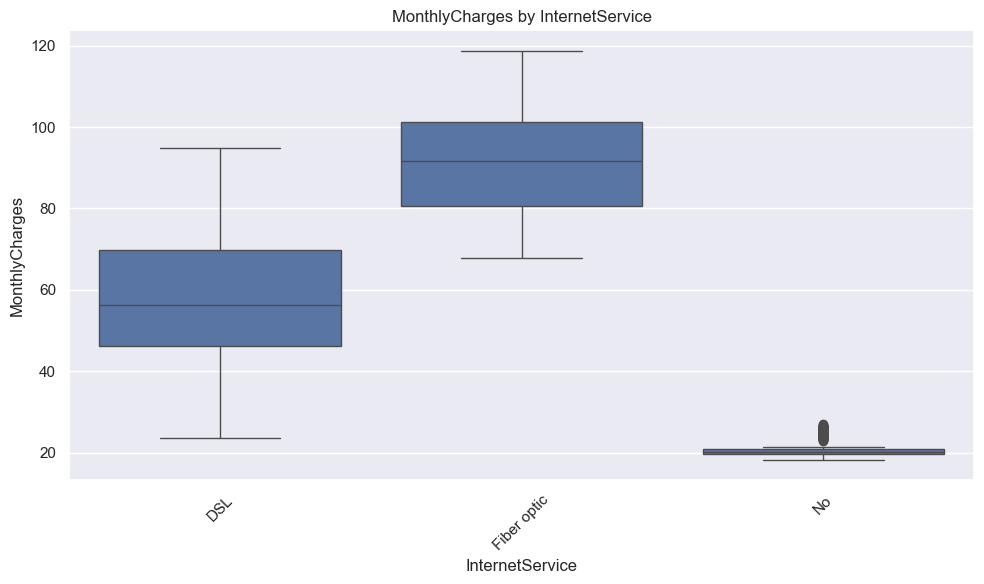


Post-hoc analysis (t-tests):
DSL vs Fiber optic:
t-statistic: -85.7702
p-value: 0.0000
Significant difference

DSL vs No:
t-statistic: 88.4524
p-value: 0.0000
Significant difference

Fiber optic vs No:
t-statistic: 215.6822
p-value: 0.0000
Significant difference


Contract:
F-statistic: 20.8280
p-value: 0.0000
Significant difference exists


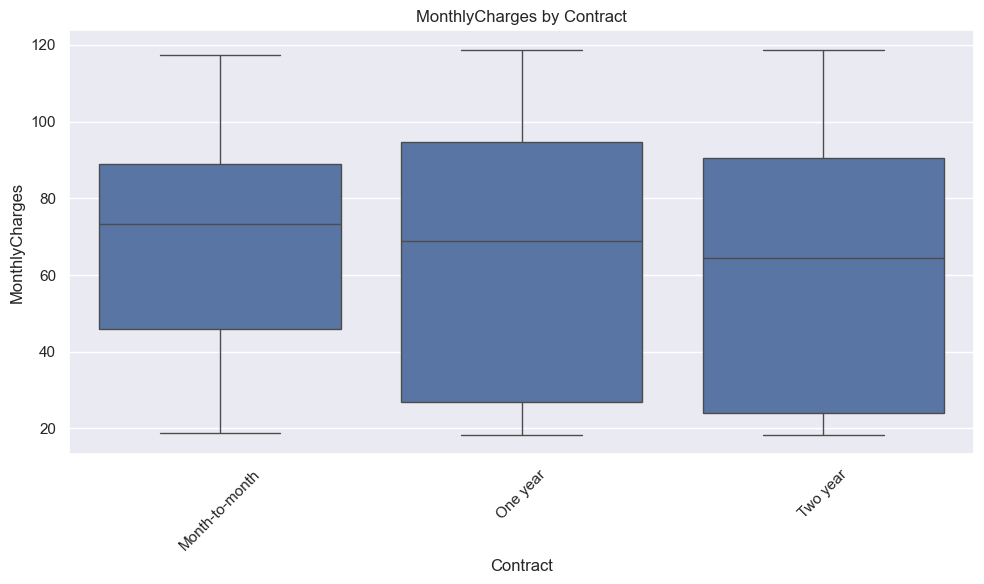


Post-hoc analysis (t-tests):
Month-to-month vs One year:
t-statistic: 1.5547
p-value: 0.1201
No significant difference

Month-to-month vs Two year:
t-statistic: 6.5510
p-value: 0.0000
Significant difference

One year vs Two year:
t-statistic: 3.5971
p-value: 0.0003
Significant difference


PaymentMethod:
F-statistic: 450.3190
p-value: 0.0000
Significant difference exists


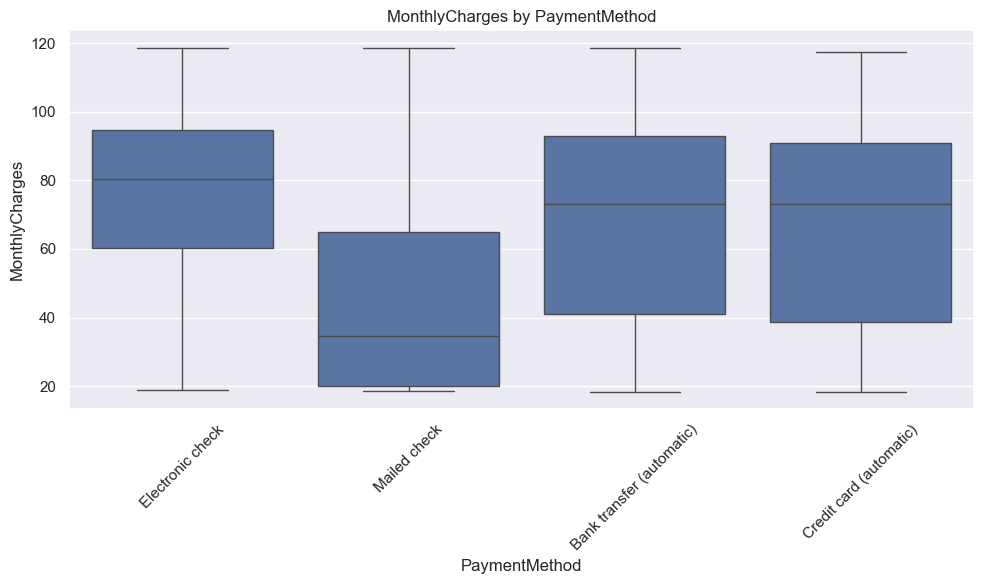


Post-hoc analysis (t-tests):
Electronic check vs Mailed check:
t-statistic: 40.0586
p-value: 0.0000
Significant difference

Electronic check vs Bank transfer (automatic):
t-statistic: 10.3320
p-value: 0.0000
Significant difference

Electronic check vs Credit card (automatic):
t-statistic: 11.0580
p-value: 0.0000
Significant difference

Mailed check vs Bank transfer (automatic):
t-statistic: -22.9603
p-value: 0.0000
Significant difference

Mailed check vs Credit card (automatic):
t-statistic: -22.1960
p-value: 0.0000
Significant difference

Bank transfer (automatic) vs Credit card (automatic):
t-statistic: 0.6158
p-value: 0.5381
No significant difference


Analyzing TotalCharges:
------------------------------

InternetService:
F-statistic: 795.6224
p-value: 0.0000
Significant difference exists


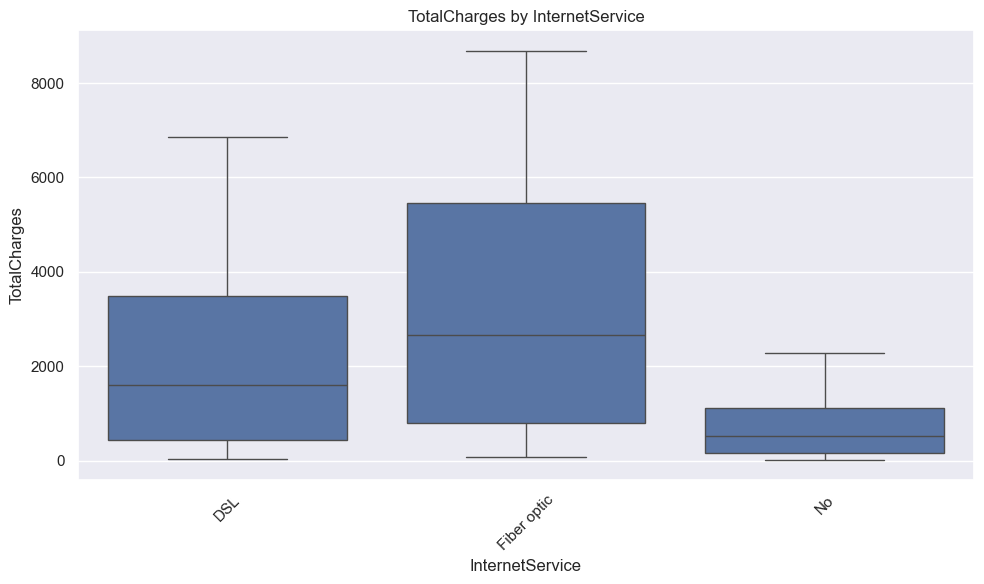


Post-hoc analysis (t-tests):
DSL vs Fiber optic:
t-statistic: -17.4481
p-value: 0.0000
Significant difference

DSL vs No:
t-statistic: 29.3068
p-value: 0.0000
Significant difference

Fiber optic vs No:
t-statistic: 38.0595
p-value: 0.0000
Significant difference


Contract:
F-statistic: 932.8765
p-value: 0.0000
Significant difference exists


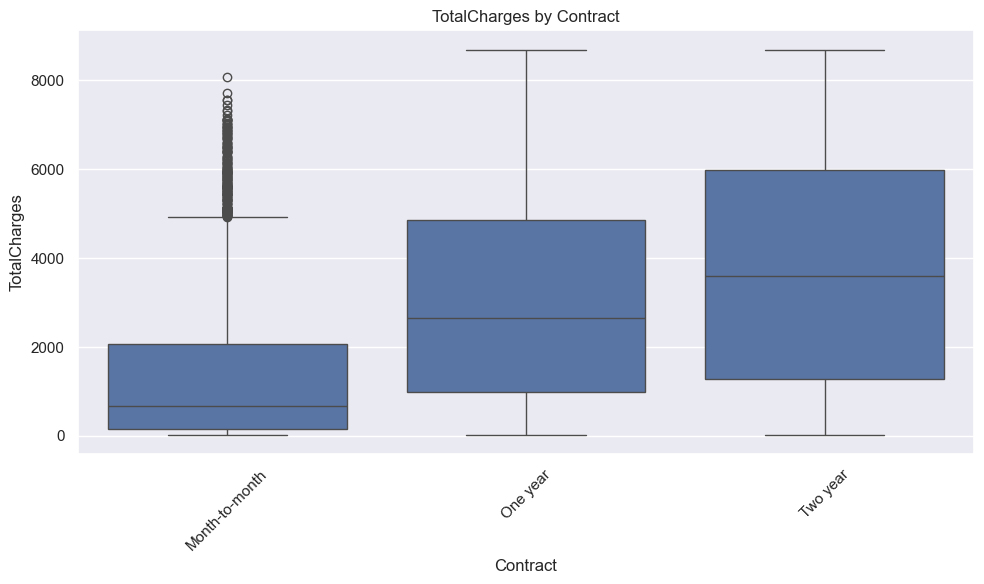


Post-hoc analysis (t-tests):
Month-to-month vs One year:
t-statistic: -30.1455
p-value: 0.0000
Significant difference

Month-to-month vs Two year:
t-statistic: -41.3333
p-value: 0.0000
Significant difference

One year vs Two year:
t-statistic: -7.9764
p-value: 0.0000
Significant difference


PaymentMethod:
F-statistic: 326.8635
p-value: 0.0000
Significant difference exists


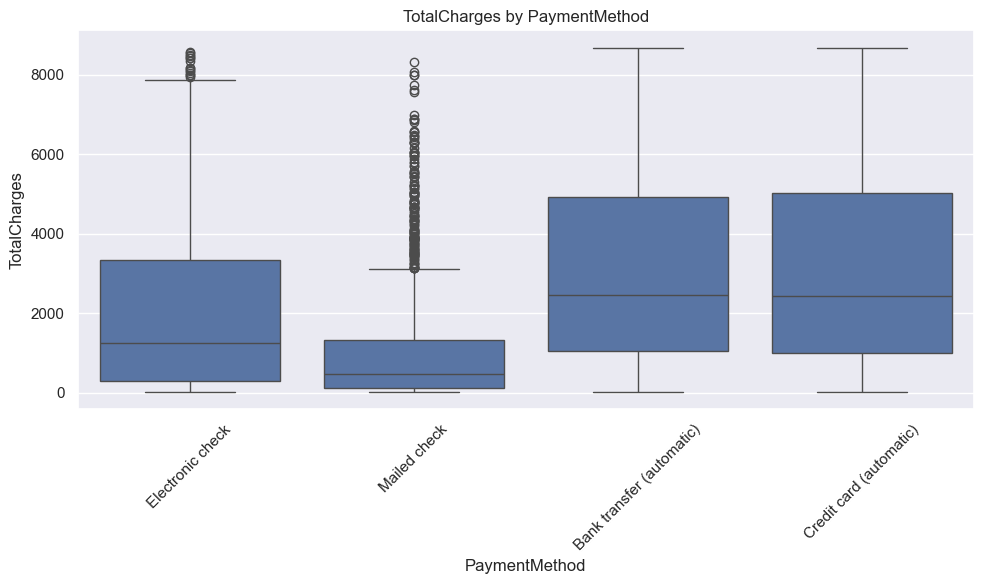


Post-hoc analysis (t-tests):
Electronic check vs Mailed check:
t-statistic: 16.7993
p-value: 0.0000
Significant difference

Electronic check vs Bank transfer (automatic):
t-statistic: -13.4910
p-value: 0.0000
Significant difference

Electronic check vs Credit card (automatic):
t-statistic: -13.2126
p-value: 0.0000
Significant difference

Mailed check vs Bank transfer (automatic):
t-statistic: -29.1502
p-value: 0.0000
Significant difference

Mailed check vs Credit card (automatic):
t-statistic: -28.5469
p-value: 0.0000
Significant difference

Bank transfer (automatic) vs Credit card (automatic):
t-statistic: 0.0859
p-value: 0.9315
No significant difference


Analyzing tenure:
------------------------------

InternetService:
F-statistic: 5.3897
p-value: 0.0046
Significant difference exists


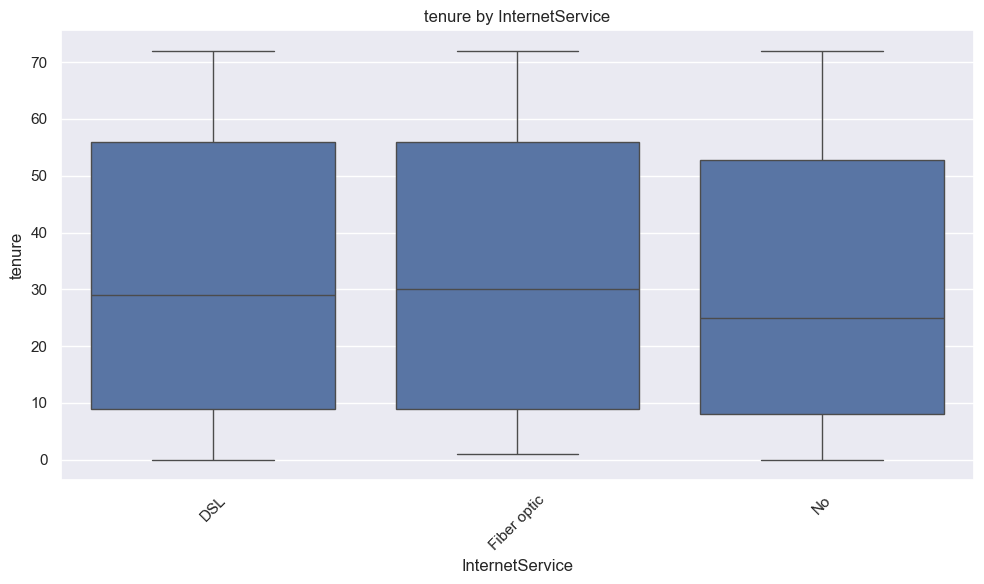


Post-hoc analysis (t-tests):
DSL vs Fiber optic:
t-statistic: -0.1445
p-value: 0.8851
No significant difference

DSL vs No:
t-statistic: 2.8243
p-value: 0.0048
Significant difference

Fiber optic vs No:
t-statistic: 3.1061
p-value: 0.0019
Significant difference


Contract:
F-statistic: 2960.0151
p-value: 0.0000
Significant difference exists


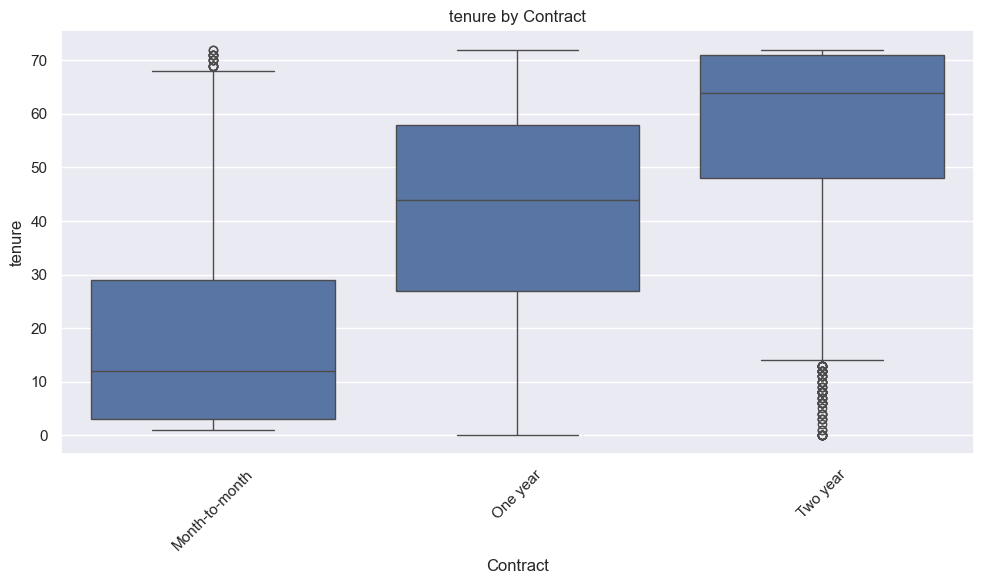


Post-hoc analysis (t-tests):
Month-to-month vs One year:
t-statistic: -43.4055
p-value: 0.0000
Significant difference

Month-to-month vs Two year:
t-statistic: -74.4516
p-value: 0.0000
Significant difference

One year vs Two year:
t-statistic: -22.1745
p-value: 0.0000
Significant difference


PaymentMethod:
F-statistic: 446.4669
p-value: 0.0000
Significant difference exists


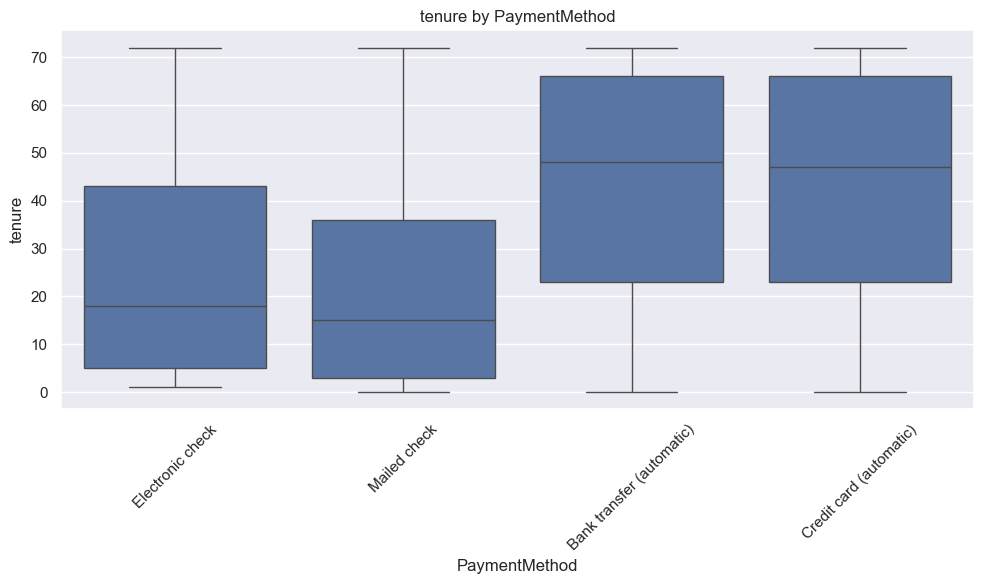


Post-hoc analysis (t-tests):
Electronic check vs Mailed check:
t-statistic: 4.7246
p-value: 0.0000
Significant difference

Electronic check vs Bank transfer (automatic):
t-statistic: -24.8760
p-value: 0.0000
Significant difference

Electronic check vs Credit card (automatic):
t-statistic: -24.1914
p-value: 0.0000
Significant difference

Mailed check vs Bank transfer (automatic):
t-statistic: -27.5994
p-value: 0.0000
Significant difference

Mailed check vs Credit card (automatic):
t-statistic: -26.9314
p-value: 0.0000
Significant difference

Bank transfer (automatic) vs Credit card (automatic):
t-statistic: 0.4609
p-value: 0.6449
No significant difference



In [23]:
# Simple one-way ANOVA test for each numerical variable against categorical variables
numerical_vars = ['MonthlyCharges', 'TotalCharges', 'tenure']
categorical_vars = ['InternetService', 'Contract', 'PaymentMethod']

for num_var in numerical_vars:
    print(f"\nAnalyzing {num_var}:")
    print("-" * 30)
    
    for cat_var in categorical_vars:
        try:
            # Get unique categories and their corresponding values
            categories = df[cat_var].unique()
            groups = [df[df[cat_var] == cat][num_var].values for cat in categories]
            
            # Perform ANOVA
            f_stat, p_val = stats.f_oneway(*groups)
            
            print(f"\n{cat_var}:")
            print(f"F-statistic: {f_stat:.4f}")
            print(f"p-value: {p_val:.4f}")
            print("Significant difference exists" if p_val < 0.05 else "No significant difference")
            
            # Visualize with box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=cat_var, y=num_var)
            plt.title(f'{num_var} by {cat_var}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # If significant, perform post-hoc t-tests
            if p_val < 0.05:
                print("\nPost-hoc analysis (t-tests):")
                for i in range(len(categories)):
                    for j in range(i + 1, len(categories)):
                        cat1, cat2 = categories[i], categories[j]
                        t_stat, t_pval = stats.ttest_ind(
                            df[df[cat_var] == cat1][num_var],
                            df[df[cat_var] == cat2][num_var]
                        )
                        print(f"{cat1} vs {cat2}:")
                        print(f"t-statistic: {t_stat:.4f}")
                        print(f"p-value: {t_pval:.4f}")
                        print("Significant difference" if t_pval < 0.05 else "No significant difference")
                        print()
                        
        except Exception as e:
            print(f"Error analyzing {cat_var} vs {num_var}: {str(e)}")

## 9. Feature Engineering and ML Data Preparation

Let's prepare our data for machine learning by:
1. Converting categorical variables to numeric
2. Creating new features
3. Scaling numerical variables
4. Preparing the final dataset

In [ ]:
# Import additional required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a copy of the dataframe for ML
df_ml = df.copy()

# 1. Convert target variable (Churn) to numeric
le = LabelEncoder()
df_ml['Churn'] = le.fit_transform(df_ml['Churn'])

# 2. Feature Engineering

# 2.1 Create tenure-related features
df_ml['TenurePerService'] = df_ml['tenure'] / (df_ml['TotalServices'] + 1)  # Adding 1 to avoid division by zero
df_ml['TenureRange'] = pd.qcut(df_ml['tenure'], q=5, labels=['Very New', 'New', 'Medium', 'Long', 'Very Long'])

# 2.2 Create charge-related features
df_ml['AvgMonthlyCharges'] = df_ml['TotalCharges'] / (df_ml['tenure'] + 1)  # Adding 1 to avoid division by zero
df_ml['ChargePerService'] = df_ml['MonthlyCharges'] / (df_ml['TotalServices'] + 1)

# 2.3 Create service-related features
df_ml['HasMultipleServices'] = (df_ml['TotalServices'] > 1).astype(int)
df_ml['HasBasicServices'] = ((df_ml['PhoneService'] == 'Yes') | 
                           (df_ml['InternetService'] != 'No')).astype(int)

# 3. Encoding Categorical Variables

# 3.1 Binary categorical variables
binary_vars = ['HasPartner', 'HasDependents', 'HasPhoneService', 'HasMultipleLines',
               'HasOnlineSecurity', 'HasOnlineBackup', 'HasDeviceProtection',
               'HasTechSupport', 'HasStreamingTV', 'HasStreamingMovies', 'HasPaperlessBilling']

# Convert Yes/No columns to 1/0
for var in df_ml.select_dtypes(include=['object']).columns:
    if df_ml[var].nunique() == 2:
        df_ml[var] = (df_ml[var] == 'Yes').astype(int)

# 3.2 Create dummy variables for non-binary categorical variables
categorical_vars = ['InternetService', 'Contract', 'PaymentMethod']
df_ml = pd.get_dummies(df_ml, columns=categorical_vars, drop_first=True)

# 4. Feature Scaling
# Select numerical columns for scaling
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TenurePerService', 
                 'AvgMonthlyCharges', 'ChargePerService']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
df_ml[numerical_cols] = scaler.fit_transform(df_ml[numerical_cols])

# 5. Prepare final feature set
# Drop unnecessary columns
columns_to_drop = ['TenureRange', 'customerID']  # Add any other columns you want to drop
df_ml = df_ml.drop(columns=columns_to_drop, errors='ignore')

# Display information about the prepared dataset
print("Feature Engineering Complete!")
print("\nDataset Shape:", df_ml.shape)
print("\nFeatures:")
for col in df_ml.columns:
    if col != 'Churn':
        print(f"- {col}")

# Display sample of prepared data
print("\nSample of prepared data:")
display(df_ml.head())

# Save feature names for later use
feature_names = [col for col in df_ml.columns if col != 'Churn']

# 6. Split features and target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# 7. Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 8. Check for class imbalance
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))

# Save the processed data for later use
processed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': feature_names,
    'scaler': scaler
}